In [1]:
import cv2
import torch
import imutils
import time
import numpy as np
import sys
from face_detection.face_alignment import FaceAlignment

import glob
import os
from os.path import join, dirname, abspath
from models.FaceNet import FaceNet
from registration_database.RegistrationDatabase import RegistrationDatabase

ModuleNotFoundError: No module named 'cv2'

In [1]:
import numpy as np
import dlib
import os
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

from face_detection.face_alignment import FaceAlignment

def select_closest_face(detections, shape):
    face_dict = {}
    areas = []
    for face in detections:        
        x = face.left()
        y = face.top() 
        w = face.right() - face.left()
        h = face.bottom() - face.top()
        width, height = w +40, h + 40
        area = width * height
        face_dict[area] = (x, y, w, h)
        areas.append(area)

    return face_dict[np.array(areas).max()]

def crop_img(img, x, y, w, h):
    crop_img = img[x-20:x+w+20, y-20:y+h+20]
    crop_img = Image.fromarray(crop_img).resize((224,224))
    return np.array(crop_img)


output = "./data/lfw_aligned/"

In [6]:
img = Image.open('./data/lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg')
src = './data/lfw/'
paths = []
for folder in os.listdir(src):
    tmp = os.path.join(src, folder)
    for img in os.listdir(tmp):
        fpath = os.path.join(tmp, img)
        paths.append(fpath)

img_path = paths[0]



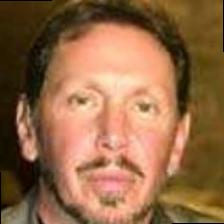

In [2]:
img_path = "./data/images/lfw/Larry_Ellison/Larry_Ellison_0003.jpg"
Image.open(img_path)

In [15]:
from deepface import DeepFace
detected_face = DeepFace.detectFace(img_path, detector_backend='mtcnn')


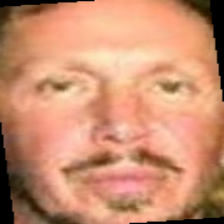

In [31]:
import matplotlib.pyplot as plt


img = Image.fromarray(np.uint8(detected_face*255)).convert('RGB')
img

In [20]:
img = np.array(Image.open(img_path))

fa = FaceAlignment()
detections = fa.detector(img, 0)
try:
    x, y, w, h = select_closest_face(detections,  img.shape[:2])
    cropped_img = crop_img(img, x-20, y-20, w+20, h+20)
except:
    pass

try:
    aligned_img = fa.align(cropped_img)
except:
    aligned_img = cropped_img

head, fpath = os.path.split(img_path)
_, folder = os.path.split(head)
dest = os.path.join(output, folder)
if not os.path.exists(dest):
    try:
        os.mkdir(dest)
    except:
        print(dest, "already exists")

save_path = os.path.join(dest, fpath)
try:
    aligned_img = Image.fromarray(aligned_img)
except:
    pass

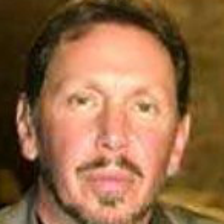

In [21]:
aligned_img

In [3]:
tmp = './test'
if len(os.listdir(tmp)) == 0:
    os.rmdir(tmp)

In [33]:
rects

rectangles[[(31, 31) (135, 135)]]

In [8]:
def crop_img(img, start_x, start_y, end_x, end_y):
    height, width = end_y - start_y, end_x - start_x
    crop_img = img[start_y:start_y+height, start_x:start_x+width]
    crop_img = cv2.resize(crop_img, (250, 250))
    return crop_img

In [17]:
read_root = os.path.join(".\IBM_face_embedding\data\lfw\lfw")
write_root = os.path.join('.\IBM_face_embedding\data\lfw_self_aligned_cropped')
#root2 = os.path.join('.', 'data', 'lfw_crop')

fa = FaceAlignment()
a = 0

for people in glob.glob(read_root + "/*"):
    name = people.split('\\')[-1]
    write_folder = os.path.join(write_root, name)
    if not os.path.exists(write_folder):
        os.mkdir(write_folder)
    for picture in glob.glob(people + "/*"):
        img1 = cv2.imread(picture)
        
        PROTO_TXT = join("face_detection", "model", "deploy.prototxt")
        MODEL = join("face_detection", "model", "res10_300x300_ssd_iter_140000.caffemodel")
        THRESHOLD = 0.5

        # Face detection model
        #print(picture)
        face_detection_model = cv2.dnn.readNetFromCaffe(PROTO_TXT, MODEL)

        h, w = img1.shape[:2]
        blob = cv2.dnn.blobFromImage(cv2.resize(img1, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
        face_detection_model.setInput(blob)
        detections = face_detection_model.forward()
        
        max_area = 0
        current_box = np.zeros(4)
        for i in np.arange(0, detections.shape[2]):
            confidence = detections[0, 0, i, 2]

            if confidence < THRESHOLD:
                continue

            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            
            #start_x , start_y, end_x, end_y = box.astype("int")
            #if max_area < (end_y - start_y * end_x - start_x):
            #    current_box = box
            #    max_area = (end_y - start_y * end_x - start_x)
        
        start_x , start_y, end_x, end_y = box.astype("int")
        #cv2.rectangle(img1, (start_x-30, start_y-30), (end_x+30, end_y+30), color, stroke)
        #cropped_img = img1
        try:
            cropped_img = crop_img(img1, start_x, start_y, end_x, end_y)
        except:
            print(f"Error with {name}")
            continue
        #print("cropped: " + str(cropped_img.shape))
        aligned_cropped_img = fa.align(cropped_img)
        if aligned_cropped_img is None:
            continue
        
        #print(aligned_cropped_img.shape)
        write_filename = "{name}.jpg".format(name=name)
        #print(write_filename)
        write_filename_root = os.path.join(write_folder, write_filename)
        #print(write_filename_root)
        cv2.imwrite(write_filename_root, aligned_cropped_img)
        
        a += 1
        print(a)
        if a == 10:
            break
            
    if a == 10:
        break
        
        
        
        #print(name)
        #print(picture)
        #print(people)

1
2
3
4
5
6
7
8
9
10


In [ ]:
root = os.path.join(".\IBM_face_embedding\data\lfw\lfw")

root2 = os.path.join('.', 'data', 'lfw_crop')
print(root)
print(root2)

In [ ]:
from PIL import Image
root = os.path.join(".\IBM_face_embedding\data\lfw\lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg")
img1 = cv2.imread(root)


#absolute_dir = dirname(abspath(__file__))
PROTO_TXT = join("face_detection", "model", "deploy.prototxt")
MODEL = join("face_detection", "model", "res10_300x300_ssd_iter_140000.caffemodel")
THRESHOLD = 0.5

# Face detection model
face_detection_model = cv2.dnn.readNetFromCaffe(PROTO_TXT, MODEL)

h, w = img1.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(img1, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
face_detection_model.setInput(blob)
detections = face_detection_model.forward()
for i in np.arange(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence < THRESHOLD:
        continue

    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    start_x , start_y, end_x, end_y = box.astype("int")


    color =(255, 0, 0)
    stroke = 3
    cv2.rectangle(img1, (start_x-30, start_y-30), (end_x+30, end_y+30), color, stroke)


#img_item = "aligned-image.png"
#cv2.imwrite(img_item, img)

img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
img = Image.fromarray(img1, 'RGB')
img.show()
#img.shape
#print(img)

In [18]:
picture = 234
print("{picture}.png".format(picture=picture))

234.png
